In [1]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [3]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [9]:
mean = train_data.mean(axis = 0)
train_data-=mean
std = train_data.std(axis=0)
train_data /= std
test_data-=mean
test_data/=std
train_data.shape

(404, 13)

In [10]:
from tensorflow import keras
from keras import layers
def build_model():
  model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        
        layers.Dense(64, activation="relu"),
        
        layers.Dense(1)
  ])
  model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["mae"])
  return model

In [15]:
from re import VERBOSE
# K fold validation
import numpy as np

k = 4
answer = 0
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores=[]
for i in range(k):
  print(f"processing fold #{i}")
  val_data = train_data[num_val_samples*i:num_val_samples*(i+1)]
  val_targets = train_targets[num_val_samples*i:num_val_samples*(i+1)]
  partial_train_data = np.concatenate([train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]], axis = 0)
  partial_train_targets = np.concatenate([train_targets[:i*num_val_samples], train_targets[(i+1)*num_val_samples:]], axis = 0)
  model = build_model()
  model.fit(partial_train_data, partial_train_targets, epochs =num_epochs, batch_size=16, verbose = 0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0)
  all_scores.append(val_mae)



processing fold #0
processing fold #1
processing fold #2
processing fold #3


In [16]:
all_scores

[1.8949812650680542, 2.4036624431610107, 2.448261260986328, 2.3933589458465576]

In [17]:
np.mean(all_scores)

2.2850659787654877

In [18]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
 print(f"Processing fold #{i}")
 val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
 val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
 partial_train_data = np.concatenate(
 [train_data[:i * num_val_samples],
 train_data[(i + 1) * num_val_samples:]],
 axis=0)
 partial_train_targets = np.concatenate(
 [train_targets[:i * num_val_samples],
 train_targets[(i + 1) * num_val_samples:]],
 axis=0)
 model = build_model()
 history = model.fit(partial_train_data, partial_train_targets,
 validation_data=(val_data, val_targets),
 epochs=num_epochs, batch_size=16, verbose=0)
 mae_history = history.history["val_mae"]
 all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [19]:
average_mae_history = [
 np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

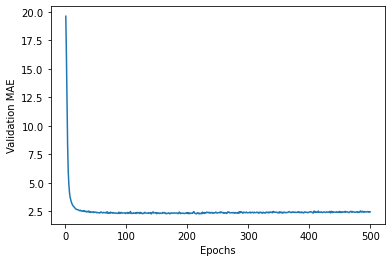

In [21]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

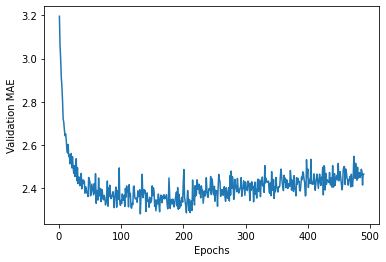

In [22]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [23]:
model = build_model()
model.fit(train_data, train_targets,
epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 15.7267 - mae: 2.4266


In [24]:
test_mae_score

2.4266488552093506

In [25]:
predictions = model.predict(test_data)
predictions[0]

array([8.277744], dtype=float32)

In [26]:
test_targets[0]

7.2